In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torch
import torchvision
tf = torchvision.transforms.ToTensor()
nm = torchvision.transforms.Normalize(mean=[0.5], std=[0.5])
from pathlib import Path
from tqdm import tqdm
import PIL
import yaml
from omegaconf import OmegaConf

from rqvae.models.rqvae.rqvae import RQVAE
from rqvae.utils.config import load_config, augment_arch_defaults
from rqvae.models import create_model


In [4]:
model_path = Path("/home/sake/userdata/sake/rq-vae-transformer-latent-score/logs/gsrqvae_f16_c1024_k4_unshared_128p_gray_unfit/11122024_173629/epoch1370_model.pt")
config_path = Path("/home/sake/userdata/sake/rq-vae-transformer-latent-score/logs/gsrqvae_f16_c1024_k4_unshared_128p_gray_unfit/11122024_173629/config.yaml")
config = OmegaConf.load(config_path)
config = load_config(config_path)
config.arch = augment_arch_defaults(config.arch)
model, _ = create_model(config.arch)
model.load_state_dict(torch.load(model_path)["state_dict"])
model.eval()
model.cuda()


Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


RQVAE(
  (encoder): Encoder(
    (conv_in): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0-1): 2 x Module(
        (block): ModuleList(
          (0-1): 2 x ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=True)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
      (2): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2

In [5]:
img_paths = list(Path("/home/sake/userdata/olimpic_dataset/grandstaff-lmx").rglob("**/*_128.jpg"))

In [6]:
image = PIL.Image.open(list(img_paths)[10000])

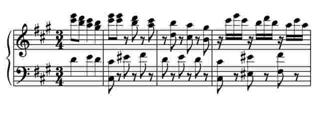

In [7]:
image

In [8]:
image = tf(image)
image = nm(image)
image
image.shape

torch.Size([1, 128, 324])

In [9]:
out = model.get_codes(image.unsqueeze(0).cuda())
out.shape


torch.Size([1, 8, 20, 4])

In [10]:
decoded = model.decode_code(out)
decoded.shape

torch.Size([1, 1, 128, 320])

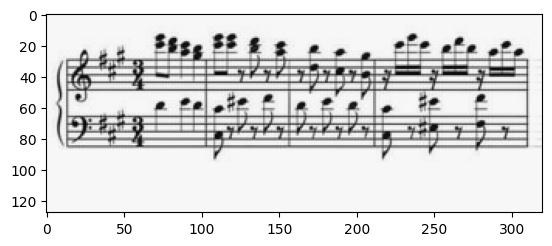

In [14]:
import matplotlib.pyplot as plt
plt.imshow(decoded.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


In [13]:
decoded_0 = model.decode_partial_code(out, 0)
decoded_0.shape

torch.Size([1, 1, 128, 320])

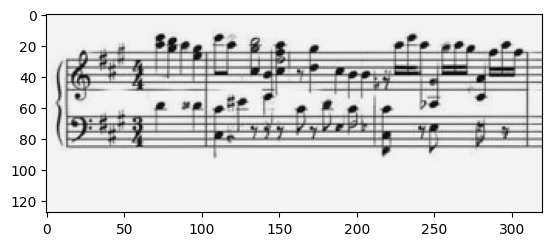

In [15]:
import matplotlib.pyplot as plt
plt.imshow(decoded_0.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


In [16]:
decoded_1 = model.decode_partial_code(out, 1, decode_type='add')
decoded_1.shape

torch.Size([1, 1, 128, 320])

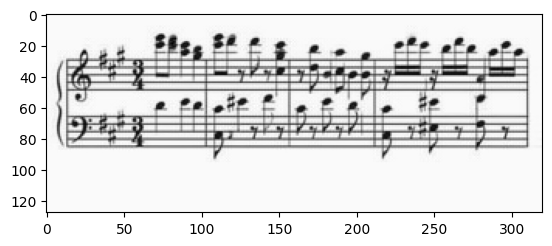

In [17]:
import matplotlib.pyplot as plt
plt.imshow(decoded_1.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


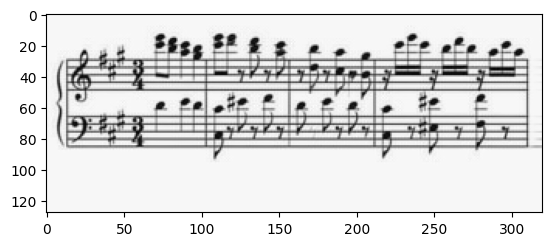

In [18]:
decoded_2 = model.decode_partial_code(out, 2, decode_type='add')
decoded_2.shape
import matplotlib.pyplot as plt
plt.imshow(decoded_2.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


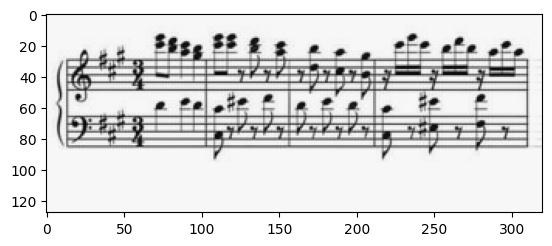

In [19]:
decoded_3 = model.decode_partial_code(out, 3, decode_type='add')
decoded_3.shape
import matplotlib.pyplot as plt
plt.imshow(decoded_3.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()

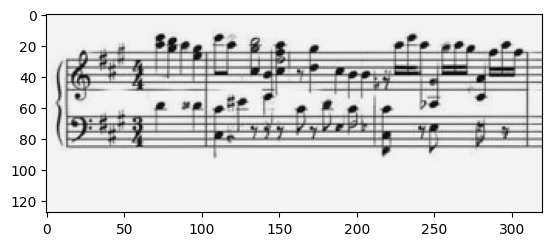

In [23]:
decoded_0 = model.decode_partial_code(out, 0, decode_type='select')
decoded_0.shape
import matplotlib.pyplot as plt
plt.imshow(decoded_0.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


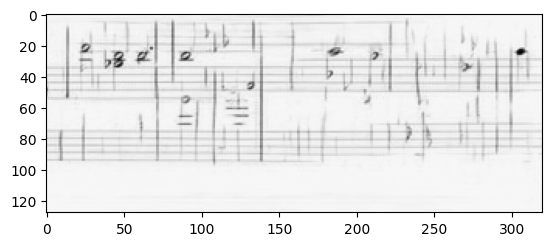

In [24]:
decoded_1 = model.decode_partial_code(out, 1, decode_type='select')
decoded_1.shape
import matplotlib.pyplot as plt
plt.imshow(decoded_1.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


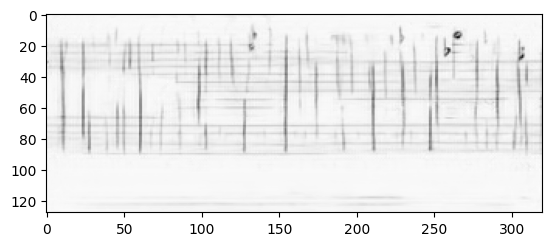

In [20]:
decoded_2 = model.decode_partial_code(out, 2, decode_type='select')
decoded_2.shape
import matplotlib.pyplot as plt
plt.imshow(decoded_2.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()


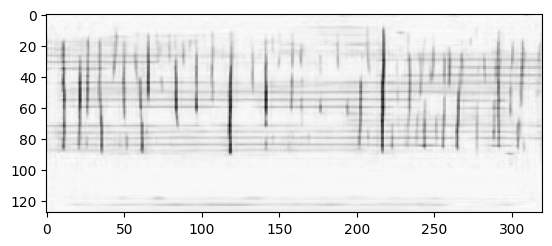

In [25]:
decoded_3 = model.decode_partial_code(out, 3, decode_type='select')
decoded_3.shape
import matplotlib.pyplot as plt
plt.imshow(decoded_3.squeeze(0).squeeze(0).cpu().numpy(), cmap='gray')
plt.show()